<a href="https://colab.research.google.com/github/josetaco/Proyectos/blob/main/1ra_Analisis_exploratoria_de_datos(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats # estadística
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import kurtosis

In [ ]:
# instalamos
!pip install statistics

In [ ]:
#Cargomos la base de datos de tratamiento
from google.colab import files
files.upload()

Saving Data_Nutricion.xlsx to Data_Nutricion.xlsx


{'Data_Nutricion.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
#Visualizamos la base de datos
data_nutricion = pd.read_excel('Data_Nutricion.xlsx', sheet_name='Hoja1')
data_nutricion.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Persona 1,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,Persona 2,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,Persona 3,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,Persona 4,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,Persona 5,160.3,16,58.0,30.1,22.260196,79.6,97.9,0.813075,0.496569,30.276688,40.439521,10.0,19.0,20.0,19.0


In [ ]:
data_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    int64  
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
data_nutricion.isnull().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
dtype: int64

Los valores de las variables estan completas

In [ ]:
numerical_features=['talla','edad','peso_kg','circun_cuello','IMC','circun_cintura','cadera','ind_cintura_cadera','ind_cintura_estatura',	'por_grasa_corporal','masa_corporal_magra_kg','pliegue_cutaneo_BICEPS','pliegue_cutaneo_TRICEPS','pliegue_cutaneo_ESCAPULAR','pliegue_cutaneo_SUPRAILIACO']

In [ ]:
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  data_nutricion[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  data_nutricion[feature_name].describe().round(2)

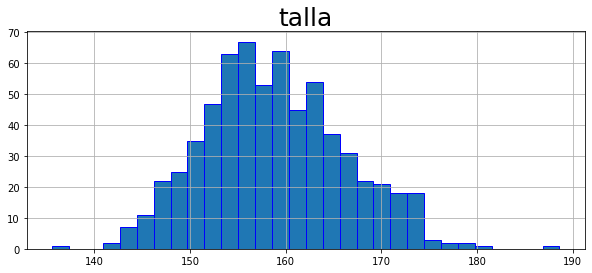

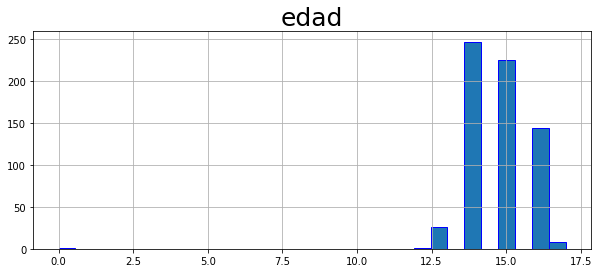

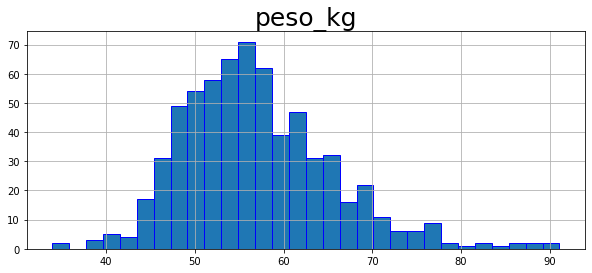

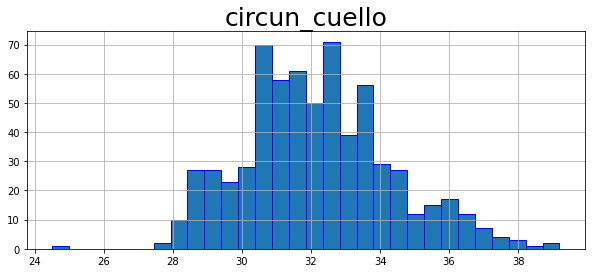

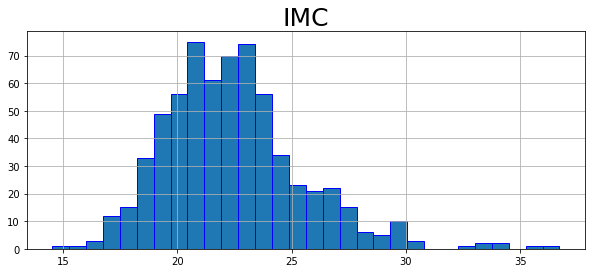

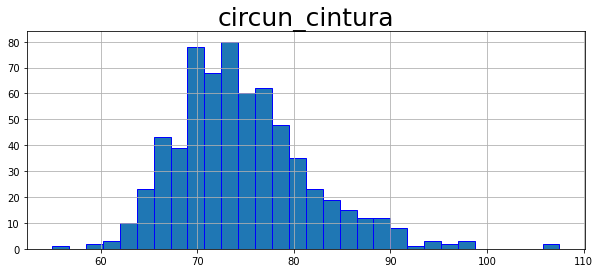

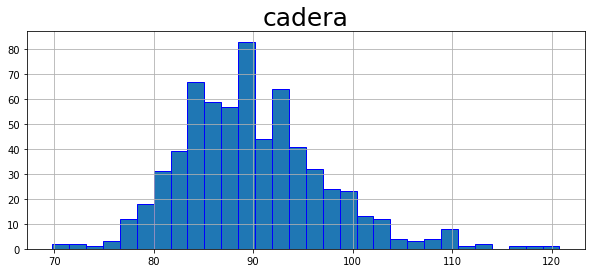

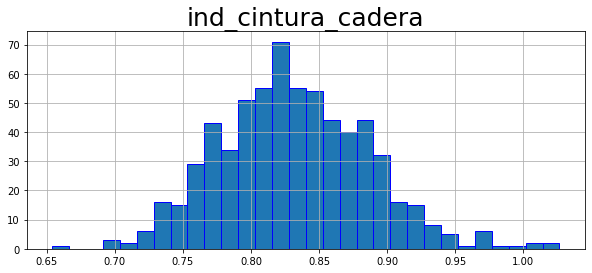

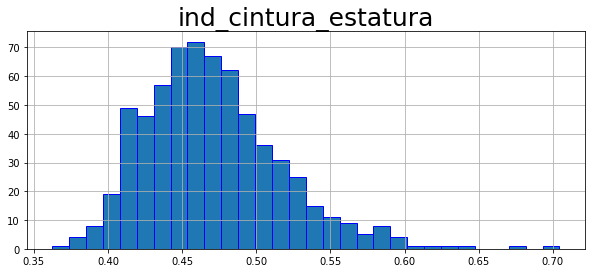

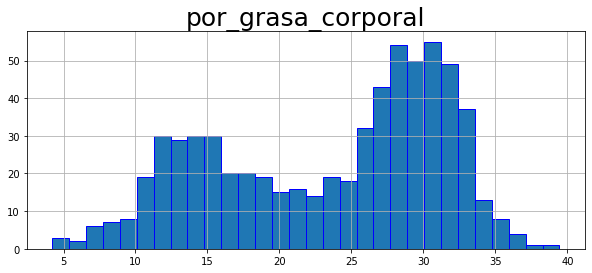

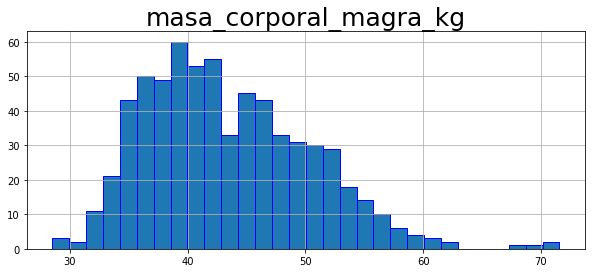

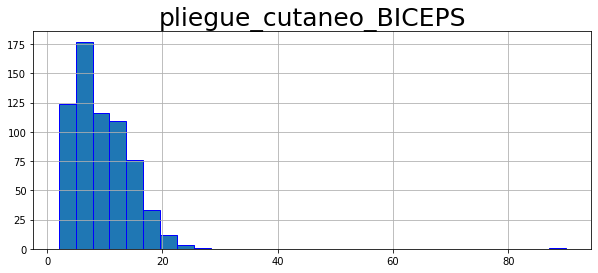

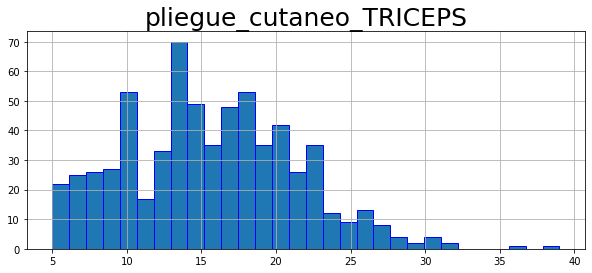

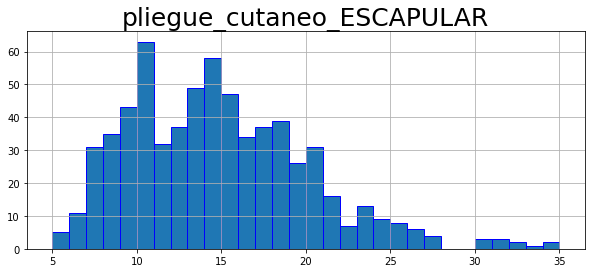

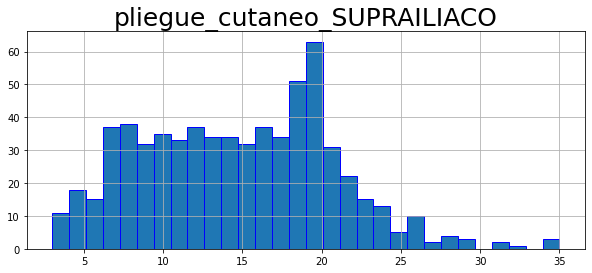

In [ ]:
for x in numerical_features:
  desc_num_feature(x)

Observacion: Podemos ver  IMC,CADER, ind_cintura_cadera y ind_cintura_estatura, pareciera que siguen una distribucion con cierto sesgo, por por otro lado las otras variables no siguen una estructura.

In [ ]:
plt.figure(figsize=(15, 7))
feature = data_nutricion[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

## Estadisticas

In [ ]:
data_nutricion.describe()

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,158.811656,14.759202,56.919479,32.156288,22.417009,74.626687,89.881135,0.831161,0.470598,23.503723,43.389738,9.181748,15.647239,14.383436,14.679448
std,7.395948,1.053992,8.518508,2.160135,3.038925,6.987753,7.212152,0.054591,0.046159,7.878067,6.960007,5.661837,5.692567,5.307465,5.953868
min,135.600000,0.000000,33.900000,24.500000,14.537886,55.000000,69.800000,0.654018,0.362319,4.214310,28.498090,2.000000,5.000000,5.000000,3.000000
25%,153.775000,14.000000,51.000000,30.700000,20.275393,70.000000,85.000000,0.794523,0.438933,15.893914,38.151508,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.174447,73.800000,89.000000,0.827760,0.464882,26.094372,42.357287,8.000000,16.000000,14.000000,15.000000
75%,163.600000,15.000000,61.700000,33.500000,23.906612,78.000000,94.000000,0.866749,0.494174,30.073493,48.120857,12.000000,19.000000,18.000000,19.000000
max,188.600000,17.000000,91.100000,39.200000,36.708603,107.500000,120.800000,1.026528,0.704411,39.445282,71.568947,90.000000,39.000000,35.000000,35.000000


# Varianza

In [ ]:
#Varianza

for x in numerical_features:
  varianza = np.var(data_nutricion[x])
  print(f"La varianza de {x}: ",round(varianza, 2))


La varianza de talla:  54.62
La varianza de edad:  1.11
La varianza de peso_kg:  72.45
La varianza de circun_cuello:  4.66
La varianza de IMC:  9.22
La varianza de circun_cintura:  48.75
La varianza de cadera:  51.94
La varianza de ind_cintura_cadera:  0.0
La varianza de ind_cintura_estatura:  0.0
La varianza de por_grasa_corporal:  61.97
La varianza de masa_corporal_magra_kg:  48.37
La varianza de pliegue_cutaneo_BICEPS:  32.01
La varianza de pliegue_cutaneo_TRICEPS:  32.36
La varianza de pliegue_cutaneo_ESCAPULAR:  28.13
La varianza de pliegue_cutaneo_SUPRAILIACO:  35.39


La varianza dealgunas variables es muy baja, parecieran ser constantes, por lo que podemos decir que no aportan mucho.

# Desviacion estandar

In [ ]:
#Desviacion estandar de las variables

for x in numerical_features:
  varianza = stats.stdev(data_nutricion[x])
  print(f"La desviacion estandar de {x}: ",round(varianza, 2))



La desviacion estandar de talla:  7.4
La desviacion estandar de edad:  1.05
La desviacion estandar de peso_kg:  8.52
La desviacion estandar de circun_cuello:  2.16
La desviacion estandar de IMC:  3.04
La desviacion estandar de circun_cintura:  6.99
La desviacion estandar de cadera:  7.21
La desviacion estandar de ind_cintura_cadera:  0.05
La desviacion estandar de ind_cintura_estatura:  0.05
La desviacion estandar de por_grasa_corporal:  7.88
La desviacion estandar de masa_corporal_magra_kg:  6.96
La desviacion estandar de pliegue_cutaneo_BICEPS:  5.66
La desviacion estandar de pliegue_cutaneo_TRICEPS:  5.69
La desviacion estandar de pliegue_cutaneo_ESCAPULAR:  5.31
La desviacion estandar de pliegue_cutaneo_SUPRAILIACO:  5.95


# Coeficientes de variacion

In [ ]:
for x in numerical_features:
  media =      data_nutricion[x].mean()
  d_estandar = data_nutricion[x].std()
  Coef_variacion = d_estandar/media*100
  print(f"La desviacion estandar de {x}: ",round(Coef_variacion, 2),"%")

La desviacion estandar de talla:  4.66 %
La desviacion estandar de edad:  7.14 %
La desviacion estandar de peso_kg:  14.97 %
La desviacion estandar de circun_cuello:  6.72 %
La desviacion estandar de IMC:  13.56 %
La desviacion estandar de circun_cintura:  9.36 %
La desviacion estandar de cadera:  8.02 %
La desviacion estandar de ind_cintura_cadera:  6.57 %
La desviacion estandar de ind_cintura_estatura:  9.81 %
La desviacion estandar de por_grasa_corporal:  33.52 %
La desviacion estandar de masa_corporal_magra_kg:  16.04 %
La desviacion estandar de pliegue_cutaneo_BICEPS:  61.66 %
La desviacion estandar de pliegue_cutaneo_TRICEPS:  36.38 %
La desviacion estandar de pliegue_cutaneo_ESCAPULAR:  36.9 %
La desviacion estandar de pliegue_cutaneo_SUPRAILIACO:  40.56 %


Los porcentajes menores son los que estan perdiendo importancia para el modelo, como ind_cintura_cadera y ind_cintura_cadera. 

# Cuantiles

In [ ]:
for x in numerical_features:
  Q = data_nutricion[x].quantile([.90])
  print(f'Cuantil de {x}-->', round(Q, 2))
  

Cuantil de talla--> 0.9    169.16
Name: talla, dtype: float64
Cuantil de edad--> 0.9    16.0
Name: edad, dtype: float64
Cuantil de peso_kg--> 0.9    68.28
Name: peso_kg, dtype: float64
Cuantil de circun_cuello--> 0.9    35.0
Name: circun_cuello, dtype: float64
Cuantil de IMC--> 0.9    26.43
Name: IMC, dtype: float64
Cuantil de circun_cintura--> 0.9    84.0
Name: circun_cintura, dtype: float64
Cuantil de cadera--> 0.9    99.0
Name: cadera, dtype: float64
Cuantil de ind_cintura_cadera--> 0.9    0.9
Name: ind_cintura_cadera, dtype: float64
Cuantil de ind_cintura_estatura--> 0.9    0.53
Name: ind_cintura_estatura, dtype: float64
Cuantil de por_grasa_corporal--> 0.9    32.34
Name: por_grasa_corporal, dtype: float64
Cuantil de masa_corporal_magra_kg--> 0.9    52.58
Name: masa_corporal_magra_kg, dtype: float64
Cuantil de pliegue_cutaneo_BICEPS--> 0.9    16.0
Name: pliegue_cutaneo_BICEPS, dtype: float64
Cuantil de pliegue_cutaneo_TRICEPS--> 0.9    23.0
Name: pliegue_cutaneo_TRICEPS, dtype: flo

# Curtosis

In [ ]:

for x in numerical_features:
  curtosis =  kurtosis(data_nutricion[x], fisher=True)
  if curtosis >0:
    print(f'Es Leptocúrtica de {x}-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    print(f'Es Mesocúrtica {x}-->', round(curtosis,2 ))
  else:
    print(f'Es Platicúrtica {x}-->', round(curtosis,2 ))

Es Platicúrtica talla--> -0.03
Es Leptocúrtica de edad--> 57.32
Es Leptocúrtica de peso_kg--> 1.28
Es Leptocúrtica de circun_cuello--> 0.1
Es Leptocúrtica de IMC--> 1.85
Es Leptocúrtica de circun_cintura--> 1.54
Es Leptocúrtica de cadera--> 1.21
Es Leptocúrtica de ind_cintura_cadera--> 0.34
Es Leptocúrtica de ind_cintura_estatura--> 1.71
Es Platicúrtica por_grasa_corporal--> -1.12
Es Leptocúrtica de masa_corporal_magra_kg--> 0.4
Es Leptocúrtica de pliegue_cutaneo_BICEPS--> 62.17
Es Leptocúrtica de pliegue_cutaneo_TRICEPS--> 0.06
Es Leptocúrtica de pliegue_cutaneo_ESCAPULAR--> 0.72
Es Platicúrtica pliegue_cutaneo_SUPRAILIACO--> -0.31


# CORRELACION DE LAS VARIABLES NUMERICAS

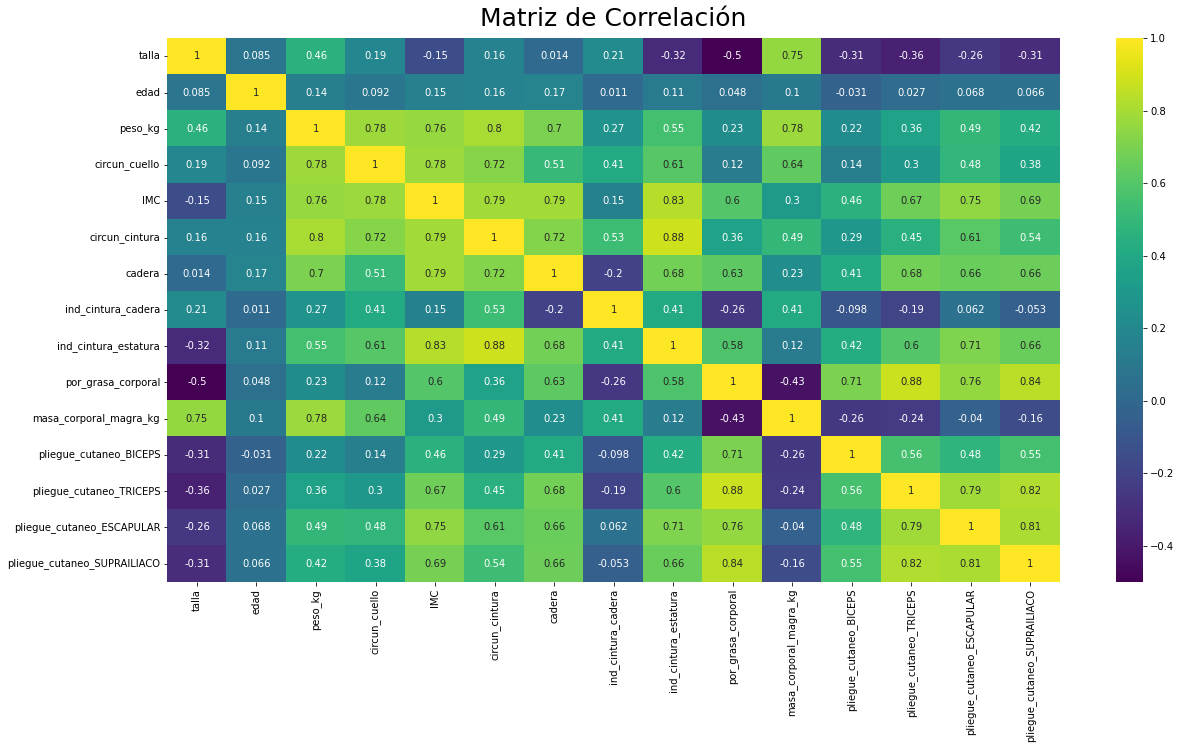

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data_nutricion.corr(),cmap='viridis',annot=True)
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

Observaciones:
Hay coeficientes de correlacion que sobrepasan por mucho 0.04, por lo que podriamos elimarlos por que hay otra variable que estaria explicando lo mismo y seria una redundancia de datos.